# 推荐系统

# 1. 推荐系统的基本概念

## 1.1 什么是推荐系统

随着信息技术和互联网的发展，人们逐渐从信息匮乏的时代走入了**信息过载（information overload）**的时代。在这个时代，无论是信息消费者还是信息生产者都遇到了很大的挑战：
+ 作为信息消费者，如何从大量信息中找到自己感兴趣的信息是一件非常困难的事情；
+ 作为信息生产者，如何让自己生产的信息脱颖而出，受到广大用户的关注，也是一件非常困难的事情

众所周知，为了解决信息过载的问题，提出了很多天才的解决方案：
+ 分类目录。分类目录将著名的网站分门别类，从而方便用户根据类别查找网站。但是随着互联网规模的不断扩大，分类目录网站也只能覆盖少量的热门网站，越来越不能满足用户的需求。比较有代表性的国外的雅虎，还有国内的hao123。
+ 搜索引擎。搜索引擎可以让用户通过搜索关键词找到自己需要的信息。但是，搜索引擎需要用户主动提供准确的关键词来寻找信息，因此不能解决用户的很多其他需求，比如当用户无法找到准确描述自己需求的关键词时，搜索引擎就无能为力了。比较著名的公司有谷歌和百度。
+ 和搜索引擎一样，推荐系统也是一种帮助用户快速发现有用信息的工具。和搜索引擎不同的是，推荐系统不需要用户提供明确的需求，而是通过分析用户的历史行为给用户的兴趣建模，从而主动给用户推荐能够满足他们兴趣和需求的信息。主要的应用今日头条，虾米音乐，电商猜你喜欢，豆瓣。

从某种意义上说，推荐系统和搜索引擎对于用户来说是两个互补的工具。搜索引擎满足了用户有明确目的时的主动查找需求，而推荐系统能够在用户没有明确目的的时候帮助他们发现感兴趣的新内容。

**推荐系统的任务**就是联系用户和信息，一方面帮助用户发现对自己有价值的信息，另一方面让信息能够展现在对它感兴趣的用户面前，从而实现信息消费者和信息生产者的双赢。

## 1.2 评测指标

一个完整的推荐系统一般存在3个参与方：用户、物品提供者和提供推荐系统的网站。因此在评测一个推荐算法时，需要同时考虑三方的利益，一个好的推荐系统是能够令三方共赢的系统。

好的推荐系统不仅仅能够准确预测用户的行为，而且能够扩展用户的视野，帮助用户发现那些他们可能会感兴趣，但却不那么容易发现的东西。同时，推荐系统还要能够帮助商家将那些被埋没在长尾中的好商品介绍给可能会对它们感兴趣的用户。

在介绍测评指标之前，我们先介绍下推荐系统里面常用的一些数学定义：
+ 设C为全体用户集合，可能会涵盖用户的历史行为、社交关系、兴趣点、所处上下文环境等；
+ 设S为全部商品/推荐内容集合；
+ 设u是评判把$S_i$推荐$C_i$的好坏评判函数
+ 推荐是对于c∈C，找到s∈S，使得u最大，即$$存在c∈C,s_c^{'}=argmax(u(c,s)),s∈S$$

### 1.2.1 预测准确度

预测准确度度量一个推荐系统或者推荐算法预测用户行为的能力。

#### ● 评分预测

很多提供推荐服务的网站都有一个让用户给物品打分的功能。那么，如果知道了用户对物品的历史评分，就可以从中习得用户的兴趣模型，并预测该用户在将来看到一个他没有评过分的物品时，会给这个物品评多少分。预测用户对物品评分的行为称为评分预测。

评分预测的预测准确度一般通过均方根误差（RMSE）和平均绝对误差（MAE）计算。

对于测试集T中的一个用户u和物品i，令$r_{ui}$是用户u对物品i的实际评分，而$\hat{r}_{ui}$是推荐算法给出的预测评分：$$RMSE = \dfrac{\sqrt{\sum_{u,i∈T}{(r_{ui}-\hat{r}_{ui})}^2}}{|T|}$$$$MAE=\dfrac{\sum_{u,i∈T}|r_{ui}-\hat{r}_{ui}|}{|T|}$$

关于RMSE和MAE这两个指标的优缺点， RMSE加大了对预测不准的用户物品评分的惩罚（平方项的惩罚），因而对系统的评测更加苛刻。研究表明，如果评分系统是基于整数建立的（即用户给的评分都是整数），那么对预测结果取整会降低MAE的误差

#### ● TopN推荐

网站在提供推荐服务时，一般是给用户一个个性化的推荐列表，这种推荐叫做TopN推荐。TopN推荐的预测准确率一般通过准确率（precision）/召回率（recall）度量。

令R(u)是根据用户在训练集上的行为给用户作出的推荐列表，而T(u)是用户在测试集上的行为列表：$$Precision=\dfrac{\sum_{u∈U}|R(u)∩T(u)|}{|R(U)|}$$$$Recall=\dfrac{\sum_{u∈U}|R(u)∩T(u)|}{|T(U)|}$$

### 1.2.2 覆盖率

覆盖率（coverage）描述一个推荐系统对物品长尾的发掘能力。覆盖率有不同的定义方法，最简单的定义为推荐系统能够推荐出来的物品占总物品集合的比例。

假设推荐系统给每个用户推荐一个长度为N的物品列表R(u)。那么推荐系统的覆盖率可以通过下面的公式计算：$$Coverage=\dfrac{∪_{u∈U}|R(u)|}{|I|}$$

但是上面的定义过于粗略。覆盖率为100%的系统可以有无数的物品流行度分布。为了更细致地描述推荐系统发掘长尾的能力，需要统计推荐列表中不同物品出现次数的分布。如果所有的物品都出现在推荐列表中，且出现的次数差不多，那么推荐系统发掘长尾的能力就很好。

可以通过研究物品在推荐列表中出现次数的分布描述推荐系统挖掘长尾的能力。如果这个分布比较平，那么说明推荐系统的覆盖率较高，而如果这个分布较陡峭，说明推荐系统的覆盖率较低。在信息论和经济学中有两个著名的指标可以用来定义覆盖率。

第一个是**信息熵**：$$H=-\sum_{i=1}^{n}p(i)logp(i)$$
这里p(i)是物品i的流行度除以所有物品流行度之和。

第二个指标是基尼系数（Gini Index）：$$G=\dfrac{1}{n-1}\sum_{j=1}^{n}(2j-n-1)p(i_j)$$
这里，$i_j$是按照物品流行度p()从小到大排序的物品列表中第j个物品。

### 1.2.3 多样性

为了满足用户广泛的兴趣，推荐列表需要能够覆盖用户不同的兴趣领域，即推荐结果需要具有多样性。多样性推荐列表的好处用一句俗话表述就是“不在一棵树
上吊死”。

多样性描述了推荐列表中物品两两之间的不相似性。因此，多样性和相似性是对应的。假设$s(i, j)∈[0,1]$定义了物品i和j之间的相似度，那么用户u的推荐列表R(u)的多样性定义如下：$$Diversity(R(u))=1-\dfrac{\sum_{i,j∈R(u),i≠j}S(i,j)}{\frac{1}{2}|R(u)|(|R(u)|-1)}$$

而推荐系统的整体多样性可以定义为所有用户推荐列表多样性的平均值：$$Diversity=\dfrac{1}{|U|}\sum_{u∈U}Diversity(R(u))$$

### 1.2.4 其他指标

#### ●新颖性

新颖的推荐是指给用户推荐那些他们以前没有听说过的物品。在一个网站中实现新颖性的最简单办法是，把那些用户之前在网站中对其有过行为的物品从推荐列表中过滤掉。因此仅仅过滤掉本网站中用户有过行为的物品还不能完全实现新颖性。

评测新颖度的最简单方法是利用推荐结果的平均流行度，因为越不热门的物品越可能让用户觉得新颖。因此，如果推荐结果中物品的平均热门程度较低，那么推荐结果就可能有比较高的新颖性。但是，用推荐结果的平均流行度度量新颖性比较粗略，因为不同用户不知道的东西是不同的。
因此，要准确地统计新颖性需要做用户调查。

#### ●惊喜度

和新颖性的区别：若推荐结果和用户的历史兴趣不相似，但却让用户觉得满意，则表示惊喜度很高；而推荐结果的新颖性仅取决于用户是否听说过这个推荐结果。

目前并没有什么公认的惊喜度指标定义方式，这里只给出一种定性的度量方式。上面提到，令用户惊喜的推荐结果是和用户历史上喜欢的物品不相似，但用户却觉得满意的推荐。那么，定义惊喜度需要首先定义推荐结果和用户历史上喜欢的物品的相似度，其次需要定义用户对推荐结果的满意度。

#### ●信任度

对于基于机器学习的自动推荐系统，存在信任度（trust）的问题，如果用户信任推荐系统，那就会增加用户和推荐系统的交互。特别是在电子商务推荐系统中，让用户对推荐结果产生信任是非常重要的。同样的推荐结果，以让用户信任的方式推荐给用户就更能让用户产生购买欲，而以类似广告形式的方法推荐给用户就可能很难让用户产生购买的意愿。

度量推荐系统的信任度只能通过问卷调查的方式，询问用户是否信任推荐系统的推荐结果。提高信任度的方法主要有两种：首先需增加推荐系统的透明度，主要是提供推荐解释。其次是考虑用户的社交网络信息，即好友推荐。

#### ●实时性

在很多网站中，因为物品（新闻、微博等）具有很强的时效性，所以需要在物品还具有时效性时就将它们推荐给用户。

推荐系统的实时性包括两个方面。首先，推荐系统需要实时地更新推荐列表来满足用户新的行为变化。实时性的第二个方面是推荐系统需要能够将新加入系统的物品推荐给用户。这主要考验了推
荐系统处理物品冷启动的能力。

#### ●健壮性

任何一个能带来利益的算法系统都会被人攻击，这方面最典型的例子就是搜索引擎。搜索引擎的作弊和反作弊斗争异常激烈，这是因为如果能让自己的商品成为热门搜索词的第一个搜索果，会带来极大的商业利益。推荐系统目前也遇到了同样的作弊问题，而健壮性（即robust,鲁棒性）指标衡量了一个推荐系统抗击作弊的能力。

最著名的就是行为注入攻击（profile injection attack）。众所周知，绝大部分推荐系统都是通过分析用户的行为实现推荐算法的。那么，我们可以很简单地攻击这个算法，让自己的商品在这个推荐列表中获得比较高的排名；还有一种攻击主要针对评分系统，比如豆瓣的电影评分。这种攻击很简单，就是雇用一批人给自己的商品非常高的评分，而评分行为是推荐系统依赖的重要用户行为。

# 2.基于内容的推荐(CB)

 Collaborative Filtering Recommendations (协同过滤，简称CF) 是目前最流行的推荐方法，在研究界和工业界得到大量使用。但是，工业界真正使用的系统一般都不会只有CF推荐算法，Content-based Recommendations (CB) 基本也会是其中的一部分。

CB应该算是最早被使用的推荐方法吧，它根据用户过去喜欢的产品（本文统称为 item），为用户推荐和他过去喜欢的产品相似的产品。 CB最早主要是应用在信息检索系统当中，所以很多信息检索及信息过滤里的方法都能用于CB中。

## 2.1 CB的步骤

CB的过程一般包括以下三步：
+ 物品表示（Item Representation）：为每个item抽取出一些特征（也就是item的content了）来表示此item；
+ 特征学习（Profile Learning）：利用一个用户过去喜欢（及不喜欢）的item的特征数据，来学习出此用户的喜好特征（profile）；
+ 生成推荐列表（Recommendation Generation）：通过比较上一步得到的用户profile与候选item的特征，为此用户推荐一组相关性最大的item。 

对于上面的三个步骤给出一张很细致的流程图（第一步对应着Content Analyzer，第二步对应着Profile Learner，第三步对应着Filtering Component）：

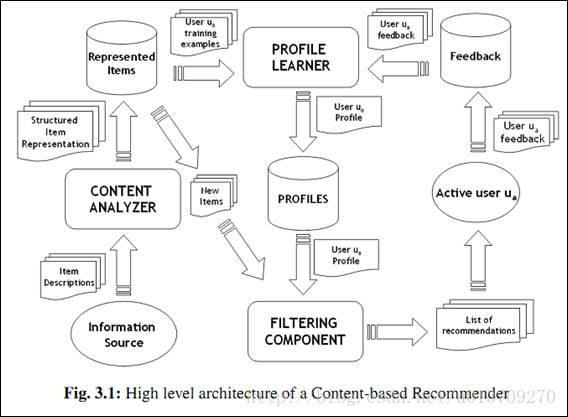

举个例子说明前面的三个步骤。随着今日头条的崛起，基于内容的文本推荐就盛行起来。在这种应用中一个item就是一篇文章。  
1. 我们首先要从文章内容中抽取出代表它们的属性。常用的方法就是利用出现在一篇文章中词来代表这篇文章，而每个词对应的权重往往使用信息检索中的tf-idf来计算。利用这种方法，一篇抽象的文章就可以使用具体的一个向量来表示了。
2. 根据用户过去喜欢什么文章来产生刻画此用户喜好的特征向量了，最简单的方法可以把用户所有喜欢的文章对应的向量的平均值作为此用户的特征向量。比如我经常在今日头条阅读技术科技相关的文章，那么今日头条的算法可能会把我的Profile中的：“互联网”、“大数据”、“机器学习”、“数据挖掘”等关键词的权重设置的比较大。  
3. 这样，当我登录头条客户端的时候，他获取到我的用户Profile后，利用CB算法将我的个人Profile与文章Item的Profile的相似度（相似度的衡量可以用余弦相似度Cosine）进行计算，然后按相似度大小取最大的前N个篇文章作为推荐结果返回给我的推荐列表中。

## 2.2 物品表示（Item Representation）

真实应用中的item往往都会有一些可以描述它的属性。这些属性通常可以分为两种：结构化的（structured）属性与非结构化的（unstructured）属性。所谓结构化的属性就是这个属性的意义比较明确，其取值限定在某个范围；而非结构化的属性往往其意义不太明确，取值也没什么限制，不好直接使用。比如在交友网站上，item就是人，一个item会有结构化属性如身高、学历、籍贯等，也会有非结构化属性（如item自己写的交友宣言，博客内容等等）。对于结构化数据，我们自然可以拿来就用；但对于非结构化数据（如文章），我们往往要先把它转化为结构化数据后才能在模型里加以使用。真实场景中碰到最多的非结构化数据可能就是文章了（如个性化阅读中）。下面我们就详细介绍下如何把非结构化的一篇文章结构化。

 如何代表一篇文章在信息检索中已经被研究了很多年了，下面介绍的表示技术其来源也是信息检索，其名称为向量空间模型（Vector Space Model，简称VSM）。

记我们要表示的所有文章集合为$D={d_1,d_2,\cdots,d_N}$，而所有文章中出现的词（对于中文文章，首先得对所有文章进行分词）的集合（也称为词典）为$T={t_1,t_2,\cdots,t_n}$。也就是说，我们有N篇要处理的文章，而这些文章里包含了n个不同的词。我们最终要使用一个向量来表示一篇文章，比如第j篇文章被表示为$$d_j=(w_{1j},w_{2j},\cdots,w_{nj})$$，其中$w_{1j}$表示第1个词$t_1$在文章j中的权重，值越大表示越重要。所以，为了表示第j篇文章，现在关键的就是如何计算$d_j$各分量的值了。

用的最多的计算方法还是信息检索中常用的词频-逆文档频率（term frequency–inverse document frequency，简称TF-IDF）。第j篇文章中与词典里第k个词对应的TF-IDF为：$$TF-IDF(t_k,d_j)=TF(t_k,d_j)log\dfrac{N}{n_k}$$其中$TF-IDF(t_k,d_j)$是第k个词在文章j中出现的次数，而$n_k$是所有文章中包括第k个词的文章数量。

最终第k个词在文章j中的权重由下面的公式获得：$$w_{kj}=\dfrac{TF-IDF(t_k,d_j)}{\sqrt{\sum_{s=1}^{|T|}TF-IDF(t_s,d_j)^2}}$$

做归一化的好处是不同文章之间的表示向量被归一到一个量级上，便于下面步骤的操作。    

## 2.3 特征学习（Profile Learning）

假设用户u已经对一些item给出了他的喜好判断，喜欢其中的一部分item，不喜欢其中的另一部分。那么，这一步要做的就是通过用户u过去的这些喜好判断，为他产生一个模型。有了这个模型，我们就可以根据此模型来判断用户u是否会喜欢一个新的item。所以，我们要解决的是一个典型的有监督分类问题，理论上机器学习里的分类算法都可以照搬进这里。

下面我们简单介绍下CB里常用的一些学习算法：

#### ●最近邻方法（k-Nearest Neighbor，简称kNN）

对于一个新的item，最近邻方法首先找用户u已经评判过并与此新item最相似的k个item，然后依据用户u对这k个item的喜好程度来判断其对此新item的喜好程度。这种做法和CF中的item-based kNN很相似，差别在于这里的item相似度是根据item的属性向量计算得到，而CF中是根据所有用户对item的评分计算得到。

  对于这个方法，比较关键的可能就是如何通过item的属性向量计算item之间的两两相似度。[2]中建议对于结构化数据，相似度计算使用欧几里得距离；而如果使用向量空间模型（VSM）来表示item的话，则相似度计算可以使用cosine。

#### ●决策树方法（k-Nearest Neighbor，简称kNN）

当item的属性较少而且是结构化属性时，决策树一般会是个好的选择。这种情况下决策树可以产生简单直观、容易让人理解的结果。而且我们可以把决策树的决策过程展示给用户u，告诉他为什么这些item会被推荐。但是如果item的属性较多，且都来源于非结构化数据（如item是文章），那么决策树的效果可能并不会很好。

#### ●朴素贝叶斯算法（Naive Bayes，简称NB）

NB算法就像它的简称一样，牛逼！NB经常被用来做文本分类，它假设在给定一篇文章的类别后，其中各个词出现的概率相互独立。它的假设虽然很不靠谱，但是它的结果往往惊人地好。再加上NB的代码实现比较简单，所以它往往是很多分类问题里最先被尝试的算法。我们现在的profile learning问题中包括两个类别：用户u喜欢的item，以及他不喜欢的item。在给定一个item的类别后，其各个属性的取值概率互相独立。我们可以利用用户u的历史喜好数据训练NB，之后再用训练好的NB对给定的item做分类

#### ●Rocchio算法

[Rocchio算法](https://en.wikipedia.org/wiki/Rocchio_algorithm)是信息检索中处理相关反馈（Relevance Feedback）的一个著名算法。比如你在搜索引擎里搜“苹果”，当你最开始搜这个词时，搜索引擎不知道你到底是要能吃的水果，还是要不能吃的苹果，所以它往往会尽量呈现给你各种结果。当你看到这些结果后，你会点一些你觉得相关的结果（这就是所谓的相关反馈了）。然后如果你翻页查看第二页的结果时，搜索引擎可以通过你刚才给的相关反馈，修改你的查询向量取值，重新计算网页得分，把跟你刚才点击的结果相似的结果排前面。比如你最开始搜索“苹果”时，对应的查询向量是{“苹果” : 1}。而当你点击了一些与Mac、iPhone相关的结果后，搜索引擎会把你的查询向量修改为{“苹果” : 1, “Mac” : 0.8, “iPhone” : 0.7}，通过这个新的查询向量，搜索引擎就能比较明确地知道你要找的是不能吃的苹果了。Rocchio算法的作用就是用来修改你的查询向量的：{“苹果” : 1}  --> {“苹果” : 1, “Mac” : 0.8, “iPhone” : 0.7}。

   在CB里，我们可以类似地使用Rocchio算法来获得用户u的profile$\vec{w}_u$：$$\vec{w}_u=β\dfrac{1}{|I_r|}\sum_{\vec{w}_j∈I_r}\vec{w}_j-γ\dfrac{1}{|I_{nr}|}\sum_{\vec{w}_k∈I_{nr}}\vec{w}_k$$其中$\vec{w}_j$表示item j的属性，$I_r$与$I_{nr}$分别表示已知的用户u喜欢与不喜欢的item集合；而β与γ为正负反馈的权重，它们的值由系统给定。

在获得$\vec{w}_u$后，对于某个给定的item j，我们可以使用$\vec{w}_u$与$\vec{w}_j$的相似度来代表用户u对j的喜好度。
Rocchio算法的一个好处是$\vec{w}_u$可以根据用户的反馈实时更新，其更新代价很小。

## 2.4 生成推荐列表（Recommendation Generation）

 如果上一步Profile Learning中使用的是分类模型（如DT、KNN和NB），那么我们只要把模型预测的用户最可能感兴趣的n个item作为推荐返回给用户即可。而如果Profile Learning中使用的直接学习用户属性的方法（如Rocchio算法），那么我们只要把与用户属性最相关的n个item作为推荐返回给用户即可。其中的用户属性与item属性的相关性可以使用如cosine等相似度度量获得。$$cos(\vec{w}_j,\vec{w}_u)=\dfrac{\vec{w}_j·\vec{w}_u}{||\vec{w}_j||_2×||\vec{w}_u||_2}$$

## 2.5 CB的优缺点

### 2.5.1 CB的优点

1. 用户之间的独立性（User Independence）：既然每个用户的profile都是依据他本身对item的喜好获得的，自然就与他人的行为无关。而CF刚好相反，CF需要利用很多其他人的数据。CB的这种用户独立性带来的一个显著好处是别人不管对item如何作弊（比如利用多个账号把某个产品的排名刷上去）都不会影响到自己。

2. 好的可解释性（Transparency）：如果需要向用户解释为什么推荐了这些产品给他，你只要告诉他这些产品有某某属性，这些属性跟你的品味很匹配等等。

3. 新的item可以立刻得到推荐（New Item Problem）：只要一个新item加进item库，它就马上可以被推荐，被推荐的机会和老的item是一致的。而CF对于新item就很无奈，只有当此新item被某些用户喜欢过（或打过分），它才可能被推荐给其他用户。所以，如果一个纯CF的推荐系统，新加进来的item就永远不会被推荐。

### 2.5.2 CB的缺点

1. item的特征抽取一般很难（Limited Content Analysis）：如果系统中的item是文档（如个性化阅读中），那么我们现在可以比较容易地使用信息检索里的方法来“比较精确地”抽取出item的特征。但很多情况下我们很难从item中抽取出准确刻画item的特征，比如电影推荐中item是电影，社会化网络推荐中item是人，这些item属性都不好抽。其实，几乎在所有实际情况中我们抽取的item特征都仅能代表item的一些方面，不可能代表item的所有方面。这样带来的一个问题就是可能从两个item抽取出来的特征完全相同，这种情况下CB就完全无法区分这两个item了。比如如果只能从电影里抽取出演员、导演，那么两部有相同演员和导演的电影对于CB来说就完全不可区分了。

2. 无法挖掘出用户的潜在兴趣（Over-specialization）：既然CB的推荐只依赖于用户过去对某些item的喜好，它产生的推荐也都会和用户过去喜欢的item相似。如果一个人以前只看与推荐有关的文章，那CB只会给他推荐更多与推荐相关的文章，它不会知道用户可能还喜欢数码。

3. 无法为新用户产生推荐（New User Problem）：新用户没有喜好历史，自然无法获得他的profile，所以也就无法为他产生推荐了。当然，这个问题CF也有。

# 3. 基于协同过滤的推荐(CF)

基于协同过滤的推荐算法是推荐系统中最基本的算法，该算法不仅在学术界得到了深入研究，而且在业界得到了广泛应用。该算法分为两大类，一类是基于用户的协同过滤算法，另一类是基于物品的协同过滤算法。

## 3.1 基于用户的协同过滤(Based-UserCF)

### 3.1.1 基础算法

基于用户的协同过滤算法是通过用户的历史行为数据发现用户对商品或内容的喜欢(如商品购买，收藏，内容评论或分享)，并对这些喜好进行度量和打分。根据不同用户对相同商品或内容的态度和偏好程度计算用户之间的关系。在有相同喜好的用户间进行商品推荐。

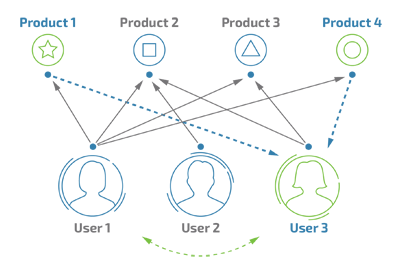

基于用户的协同过滤算法主要包括两个步骤。
1. 找到和目标用户兴趣相似的用户集合。
2. 找到这个集合中的用户喜欢的，且目标用户没有听说过的物品推荐给目标用户。

### 3.1.2 寻找相近的用户

有如下的数据集：

In [1]:
import pandas as pd
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}
criticsdf = pd.DataFrame(critics).stack()
criticsdf=pd.DataFrame([criticsdf.index.get_level_values(1),criticsdf.index.get_level_values(0),criticsdf.values],index=['user','movies','rating']).T
criticsdf

,user,movies,rating
0,Claudia Puig,Just My Luck,3
1,Gene Seymour,Just My Luck,1.5
2,Lisa Rose,Just My Luck,3
3,Mick LaSalle,Just My Luck,2
4,Gene Seymour,Lady in the Water,3
5,Jack Matthews,Lady in the Water,3
6,Lisa Rose,Lady in the Water,2.5
7,Michael Phillips,Lady in the Water,2.5
8,Mick LaSalle,Lady in the Water,3
9,Claudia Puig,Snakes on a Plane,3.5


用余弦距离评价相似度：$$cos(X,Y)=\dfrac{X·Y}{||X||_2||Y||_2}$$

Jaccard系数计算相似度：$$J(A,B)=\dfrac{|A∩B|}{|A∪B|}$$

In [2]:
from math import sqrt
import numpy as np
from math import sqrt

# 计算两个用户之间的Jaccard系数
def sim_jaccard(frame,name1,name2,user=True):
    columns = list(frame.columns)
    if user:
        nmame_s1=frame[frame[columns[0]]==name1][columns[1]]
        nmame_s2=frame[frame[columns[0]]==name2][columns[1]]
    else:
        nmame_s1=frame[frame[columns[1]]==name1][columns[0]]
        nmame_s2=frame[frame[columns[1]]==name2][columns[0]]  
    intersectionLen = len(set.intersection(*[set(nmame_s1),set(nmame_s2)]))
    if intersectionLen == 0: return 0.0
    unionLen = len(set.union(*[set(nmame_s1),set(nmame_s2)]))
    similarity = intersectionLen/float(unionLen)
    return similarity
    
print(sim_jaccard(criticsdf,'Lisa Rose','Toby'))
print(sim_jaccard(criticsdf,'Lisa Rose','Jack Matthews'))

0.5
0.8333333333333334


用欧式距离评价相似度：

$$d(X,Y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$$$$similary=\dfrac{1}{d(X,Y)^2+1}$$

In [3]:
from math import sqrt
import numpy as np
from math import sqrt

# 计算两个用户之间的Jaccard系数
def sim_distance(frame,name1,name2,user=True):
    columns = list(frame.columns)
    if user:
        name_df1=frame[frame[columns[0]]==name1][[columns[1],columns[2]]]
        name_df2=frame[frame[columns[0]]==name2][[columns[1],columns[2]]]
    else:
        name_df1=frame[frame[columns[1]]==name1][[columns[0],columns[2]]]
        name_df2=frame[frame[columns[1]]==name2][[columns[0],columns[2]]]  
    intersection = pd.merge(name_df1,name_df2,on=name_df1.columns[0])
    # 如果没有共同的item，则返回0
    if len(intersection)==0:return 0.0
    # 计算距离
    sum_of_squares=np.square(intersection.iloc[:,1]-intersection.iloc[:,2]).sum()    
    similary=1/(1+sum_of_squares)
    return similary
    
print(sim_distance(criticsdf,'Lisa Rose','Toby'))
print(sim_distance(criticsdf,'Lisa Rose','Jack Matthews'))

0.2222222222222222
0.21052631578947367


用皮尔逊相关度来评价相似度：

$$r=\dfrac{\sum XY-\dfrac{\sum X\sum Y}{n}}{\sqrt{\left(\sum X^2-\frac{(\sum X)^2}{n}\right)}{\left(\sum Y^2-\frac{(\sum Y)^2}{n}\right)}}$$

In [4]:
from math import sqrt
import numpy as np
from math import sqrt

# 计算两个用户之间的Jaccard系数
def sim_pearson(frame,name1,name2,user=True):
    columns = list(frame.columns)
    if user:
        name_df1=frame[frame[columns[0]]==name1][[columns[1],columns[2]]]
        name_df2=frame[frame[columns[0]]==name2][[columns[1],columns[2]]]
    else:
        name_df1=frame[frame[columns[1]]==name1][[columns[0],columns[2]]]
        name_df2=frame[frame[columns[1]]==name2][[columns[0],columns[2]]]  
    intersection = pd.merge(name_df1,name_df2,on=name_df1.columns[0])
    # 如果没有共同的item，则返回0
    n=len(intersection)
    if n==0:return 0.0
    # 两个用户对共同item的和
    sum1=intersection.iloc[:,1].sum()
    sum2=intersection.iloc[:,2].sum()
    # 两个用户对共同item的评分的平方和
    sum1Sq=np.square(intersection.iloc[:,1]).sum()
    sum2Sq=np.square(intersection.iloc[:,2]).sum()
    # 乘积之和
    pSum=(intersection.iloc[:,1].mul(intersection.iloc[:,2])).sum()
    # 计算皮尔逊相关度
    num=pSum - (sum1*sum2/n)
    den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
    if den==0: return 0
    r=num/den
    return r
    
print(sim_pearson(criticsdf,'Lisa Rose','Toby'))
print(sim_pearson(criticsdf,'Lisa Rose','Jack Matthews'))

0.9912407071619299
0.7470178808339965


### 3.1.3 匹配相似度高的用户

我们已经有了相似度的函数，这样就可以根据指定用户A与其他用户进行相似度计算，并且进行排序，返回与用户A最匹配的n个用户。

In [5]:
#获取一个最匹配的n个用户，或者计算一个物品最匹配的n个物品
def topMatches(prefs,name,user=True,similarity=sim_pearson,n=5):
    columns = list(prefs.columns)
    if user:
        others = [other for other in set(prefs[columns[0]]) if other!=name]
    else:
        others = [other for other in set(prefs[columns[1]]) if other!=name]
    scores = [similarity(prefs,name,other,user) for  other in others]
    other_scores = pd.Series(scores,index=others).sort_values(ascending=False)[:n]
    return other_scores

topMatches(criticsdf,name='Toby')

Lisa Rose        0.991241
Mick LaSalle     0.924473
Claudia Puig     0.893405
Jack Matthews    0.662849
Gene Seymour     0.381246
dtype: float64

### 3.1.4 推荐物品

我们查找与自己品味相近的用户，并根据他们喜欢的item，而自己没有看过的，就进行推荐，这样做太过随意了。这样可能会有一些问题：
+ 评论者还未对item做过评论，而这些影片也许是被推荐的用户所喜欢的；
+ 有些用户热衷于某一item，而其他用户并不看好。

为了解决上面这些问题，我们可以选择加权平均给item打分，根据分数的先后排名，推荐给用户

In [11]:
import numpy as np

#利用所有他人评分的加权平均，为某人提供建议
def getRecommendations(frame,person,similarity=sim_pearson,TopN=5): 
    columns = list(frame.columns)
    #与用户最匹配的n个用户，以及匹配度
    topn_sim_user=topMatches(frame,name=person,similarity=similarity,n=TopN)
    #用户没有过相关行为（观看影片，购买物品等）的物品
    no_sim_action=list(set(frame[columns[1]]) ^ set(frame[frame[columns[0]]==person][columns[1]]))#差集
    no_action = frame.pivot_table(values=columns[2],index=columns[0],columns=columns[1],aggfunc=np.sum).loc[topn_sim_user.index,no_sim_action]
    no_action['Similarity'] = topn_sim_user
    no_action = no_action[no_action['Similarity']>=0]
    #item评分加权和
    w_sum = no_action.drop('Similarity',axis=1).mul(no_action['Similarity'],axis=0).sum()
    #item相似性和
    sim_sum = no_action.notna().drop('Similarity',axis=1).mul(no_action['Similarity'],axis=0).sum()
    #计算加权平均
    rankings = (w_sum/sim_sum).sort_values(ascending=False)[:TopN]
    return rankings
    print(s)
    
print(getRecommendations(frame=criticsdf,person='Toby'))
print(getRecommendations(frame=criticsdf,person='Toby',similarity=sim_distance))                                              

movies
The Night Listener    3.347790
Lady in the Water     2.832550
Just My Luck          2.530981
dtype: float64
movies
The Night Listener    3.546527
Lady in the Water     2.727874
Just My Luck          2.597898
dtype: float64


我们不仅可以得到一个经过排名的item列表，还可以推测出用户对每个item的得分。选择不同的相似性度量方法，对结果影响微乎其微。

## 3.2 基于物品的协同过滤(Based-ItemCF)

基于物品的协同过滤（item-based collaborative filtering）算法是目前业界应用最多的算法。无论是亚马逊网，还是Netflix、Hulu、YouTube，其推荐算法的基础都是该算法。

基于用户的协同过滤算法在一些网站（如Digg）中得到了应用，但该算法有一些缺点。首先，随着网站的用户数目越来越大，计算用户兴趣相似度矩阵将越来越困难，其运算时间复杂度和空间复杂度的增长和用户数的增长近似于平方关系。其次，基于用户的协同过滤很难对推荐结果作出解释。

### 3.2.1 基础算法

基于物品的协同过滤算法与基于用户的协同过滤算法很像，将商品和用户互换。通过计算不同用户对不同物品的评分获得物品间的关系。基于物品间的关系对用户进行相似物品的推荐。这里的评分代表用户对商品的态度和偏好。简单来说就是如果用户A同时购买了商品1和商品2，那么说明商品1和商品2的相关度较高。当用户B也购买了商品1时，可以推断他也有购买商品2的需求。

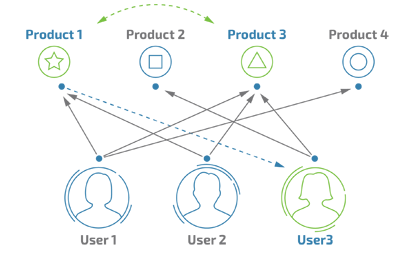

基于物品的协同过滤算法主要分为两步。
1. 计算物品之间的相似度。
2. 根据物品的相似度和用户的历史行为给用户生成推荐列表。

### 3.2.2 思路

基于物品的协同过滤沿用了基于用户的协同过滤的很多思路，其总体思路就是为每件物品预先计算好最为相近的其他物品，然后想为某个用户推荐时，就可以查看他曾经有过相关行为（购买、观看等）的物品，并从中选取排位靠前者，在构造一个加权表，其中包含了与这些选中物品最为相近的其他物品。

与Based-UserCF最为显著的区别在于，尽管第一步要求我们检查所有的数据，但是**物品间的比较不会像用户间的比较那么频繁变化**。这意味着不需要不停的计算与每件物品最为相近的物品。

Based-ItemCF计算相似度的方法和Based-UserCF的方法类似，也是用欧几里得距离、皮尔逊相似度、余弦距离等来计算。只是将Based-UserCF的里面的输入的参数Person变为Item即可。所以在这里就不在重复实现了。

### 3.2.3 构建物品比较数据集

为了对物品进行比较，我们需要构建一个包含相近物品的完整数据集，构建的完整数据集我们可以在后面的物品推荐里面重复使用。

In [14]:
def calculateSimilarItems(frame,n=5,similarity=sim_distance,TopN=5):    
    columns = list(frame.columns)
    #建立字典，以给出与这些item最为相近的item
    result={}
    # 以item为中心进行转置
    #itemPrefs=prefs.T
    c=0
    li = 0
    for item in set(frame[columns[1]]):
        #针对大数据集更新状态变量
        scores={}
        c+=1
        if c%100==0: print("%d / %d" % (c,len(itemPrefs)))
        # 寻找最为相近的物品
        topn=topMatches(frame,name=item,similarity=similarity,user=False)
        for user,score in zip(list(topn.index),list(topn)):
             scores[user]=score
        result[item]=scores
#     itemSim =pd.DataFrame(result).stack()
#     rate=list(itemSim)
#     source=[]
#     targe=[]
#     for i,j in list(itemSim.index):
#         source.append(i)
#         targe.append(j)
#     sim = pd.DataFrame(np.array([source,targe,rate]).T,columns=['sourceitem','targeitem','similiraty']).drop_duplicates()
    return result

itemSim=calculateSimilarItems(criticsdf)
print(itemSim)

{'Lady in the Water': {'You, Me and Dupree': 0.4, 'The Night Listener': 0.2857142857142857, 'Snakes on a Plane': 0.2222222222222222, 'Just My Luck': 0.2222222222222222, 'Superman Returns': 0.09090909090909091}, 'Just My Luck': {'Lady in the Water': 0.2222222222222222, 'You, Me and Dupree': 0.18181818181818182, 'The Night Listener': 0.15384615384615385, 'Snakes on a Plane': 0.10526315789473684, 'Superman Returns': 0.06451612903225806}, 'You, Me and Dupree': {'Lady in the Water': 0.4, 'Just My Luck': 0.18181818181818182, 'The Night Listener': 0.14814814814814814, 'Superman Returns': 0.05333333333333334, 'Snakes on a Plane': 0.05128205128205128}, 'Snakes on a Plane': {'Lady in the Water': 0.2222222222222222, 'The Night Listener': 0.18181818181818182, 'Superman Returns': 0.16666666666666666, 'Just My Luck': 0.10526315789473684, 'You, Me and Dupree': 0.05128205128205128}, 'Superman Returns': {'Snakes on a Plane': 0.16666666666666666, 'The Night Listener': 0.10256410256410256, 'Lady in the W

### 3.2.4 获得推荐

In [54]:
def getRecommendedItems(frame,user,itemMatch,TopN=5): 
    columns = list(frame.columns)
    userRating=frame[frame[columns[0]]==user][[columns[1],columns[2]]].drop_duplicates()
    userRatings=pd.Series(list(userRating.iloc[:,1]),index=userRating.iloc[:,0]) 
    rec=pd.DataFrame(itemMatch).loc[userRatings.index].dropna(axis=1)
    #item评分加权和
    w_sum = rec.mul(userRatings,axis=0).sum()
    sim_sum=rec.sum()
    #计算加权平均
    rankings = (w_sum/sim_sum).sort_values(ascending=False)[:TopN]
    return rankings
getRecommendedItems(criticsdf,'Toby',itemMatch=itemSim)

The Night Listener    3.182635
Just My Luck          2.598332
Lady in the Water     2.473088
dtype: float64

## 3.3 CF对比

### 3.3.1 UserCF和ItemCF对比

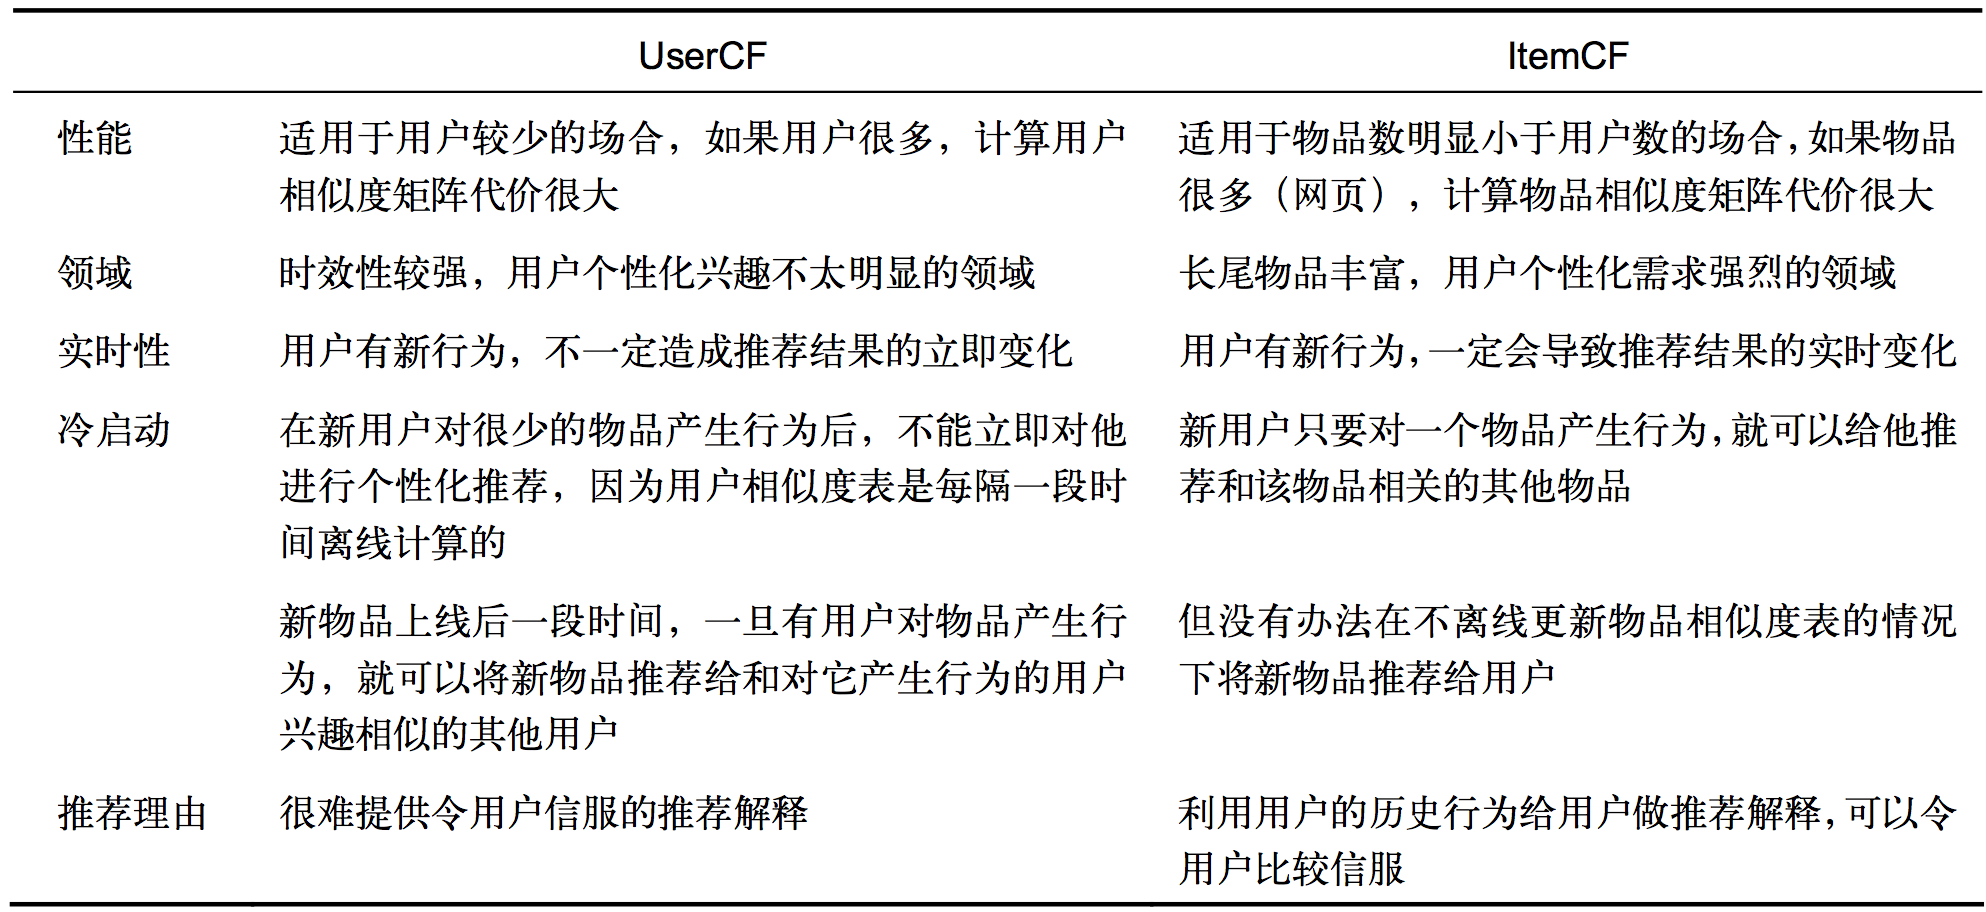

## 3.3 冷启动问题

推荐系统需要根据用户的历史行为和兴趣预测用户未来的行为和兴趣，因此大量的用户行为数据就成为推荐系统的重要组成部分和先决条件。对于很多做纯粹推荐系统的网站（比如Jinni和Pandora），或者很多在开始阶段就希望有个性化推荐应用的网站来说，如何在没有大量用户数据的情况下设计个性化推荐系统并且让用户对推荐结果满意从而愿意使用推荐系统，就是冷启动的问题。

### 3.3.1 冷启动问题简介

冷启动问题（cold start）主要分3类。
+ **用户冷启动。**用户冷启动主要解决如何给新用户做个性化推荐的问题。当新用户到来时，我们没有他的行为数据，所以也无法根据他的历史行为预测其兴趣，从而无法借此给他做个性化推荐。
+ **物品冷启动。** 物品冷启动主要解决如何将新的物品推荐给可能对它感兴趣的用户这一问题。
+ **系统冷启动。**系统冷启动主要解决如何在一个新开发的网站上（还没有用户，也没有用户行为，只有一些物品的信息）设计个性化推荐系统，从而在网站刚发布时就让用户体验到个性化推荐服务这一问题。

### 3.3.2 解决方案

对于上节3种不同的冷启动问题，有不同的解决方案。一般来说，可以参考如下解决方案。
+ **提供非个性化的推荐。** 非个性化推荐的最简单例子就是热门排行榜，我们可以给用户推荐热门排行榜，然后等到用户数据收集到一定的时候，再切换为个性化推荐。
+ 利用用户注册时提供的年龄、性别等数据做粗粒度的个性化。
+ 利用用户的社交网络账号登录（需要用户授权），导入用户在社交网站上的好友信息，然后给用户推荐其好友喜欢的物品。
+ 要求用户在登录时对一些物品进行反馈，收集用户对这些物品的兴趣信息，然后给用户推荐那些和这些物品相似的物品。
+ 对于新加入的物品，可以利用内容信息，将它们推荐给喜欢过和它们相似的物品的用户。
+ 在系统冷启动时，可以引入专家的知识，通过一定的高效方式迅速建立起物品的相关度表。